In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv ('/content/drive/MyDrive/Titanic-Dataset.csv')

In [82]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [83]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [84]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Всего пустых ячеек

In [85]:
df.isnull().sum().sum ()

866

Количество пустых ячеек по столбцам

In [86]:
df.isnull().sum ()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Новый df с заполнением пустых ячеек в Age средним возрастом, Cabin обобщением A0 и Embarked - Ghost

In [87]:
newdf = df.fillna({'Age':30, 'Cabin':'A0', 'Embarked':'Ghost' })
newdf.isnull().sum ()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [88]:
newdf.nunique ()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          148
Embarked         4
dtype: int64

newdf.min выведёт все столбцы, newdf [ ].min для одного столбца. Избавиться от FutureWarning не смог(

In [89]:
newdf[{'Age', 'SibSp', 'Parch', 'Fare'}].min()

<ipython-input-89-8cb035df791e>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  newdf[{'Age', 'SibSp', 'Parch', 'Fare'}].min()


SibSp    0.00
Age      0.42
Fare     0.00
Parch    0.00
dtype: float64

Использование list эффекта не дало...Конвертировать в list наверное не верный путь. Буду презнателен за вариант решения)

In [90]:
newdf[list[{'Age', 'SibSp', 'Parch', 'Fare'}]].max()

PassengerId                            891
Survived                                 1
Pclass                                   3
Name           van Melkebeke, Mr. Philemon
Sex                                   male
Age                                   80.0
SibSp                                    8
Parch                                    6
Ticket                           WE/P 5735
Fare                              512.3292
Cabin                                    T
Embarked                                 S
dtype: object

Немного колхозной аналитики по среднему через группировку


In [91]:
newdf_surv = newdf[{'Age', 'SibSp', 'Parch', 'Fare'}]
newdf_surv

<ipython-input-91-42738ae87720>:1: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  newdf_surv = newdf[{'Age', 'SibSp', 'Parch', 'Fare'}]


,SibSp,Age,Fare,Parch
0,1,22.0,7.2500,0
1,1,38.0,71.2833,0
2,0,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
...,...,...,...,...
886,0,27.0,13.0000,0
887,0,19.0,30.0000,0
888,1,30.0,23.4500,2
889,0,26.0,30.0000,0


In [92]:
newdf_surv = newdf.groupby(['Survived'] )
newdf_surv_avg = newdf_surv['Pclass'].mean()
newdf_surv_avg

Survived
0    2.531876
1    1.950292
Name: Pclass, dtype: float64

Выше класс - выше выживаемость. График с разбивкой по 3 классам ниже.




Text(0.5, 1.0, 'Гистограмма среднего значения Возраста')

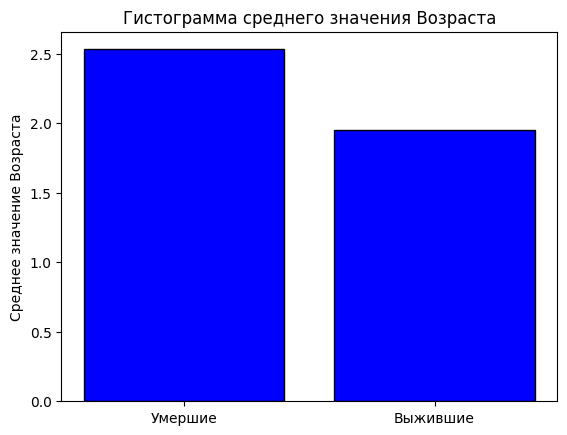

In [93]:
x = np.arange(len(newdf_surv_avg))
plt.bar(x, newdf_surv_avg, color='blue', edgecolor='black')
labels = ['Умершие', 'Выжившие']
plt.xticks(x, labels)
plt.ylabel('Среднее значение Возраста')
plt.title('Гистограмма среднего значения Возраста')

In [94]:
newdf_surv_avg = newdf_surv['Age'].mean()
newdf_surv_avg

Survived
0    30.483607
1    28.595526
Name: Age, dtype: float64

Моложе - выше выживаемость

Text(0.5, 1.0, 'Гистограмма среднего значения Возраста')

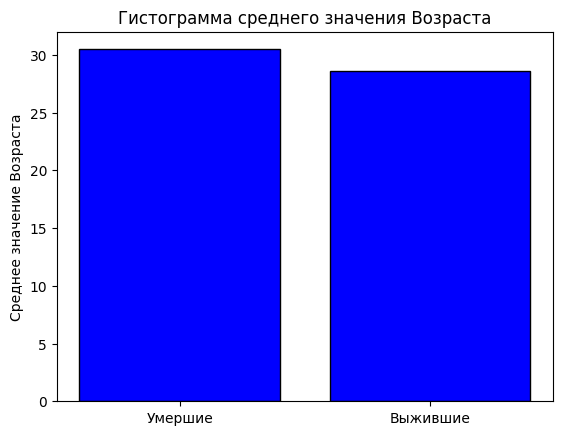

In [95]:
x = np.arange(len(newdf_surv_avg))
plt.bar(x, newdf_surv_avg, color='blue', edgecolor='black')
labels = ['Умершие', 'Выжившие']
plt.xticks(x, labels)
plt.ylabel('Среднее значение Возраста')
plt.title('Гистограмма среднего значения Возраста')

In [96]:
newdf_surv_avg = newdf_surv['SibSp'].mean()
newdf_surv_avg


Survived
0    0.553734
1    0.473684
Name: SibSp, dtype: float64

Меньше родственников - выше выживаемость

Text(0.5, 1.0, 'Гистограмма среднего значения Родственников')

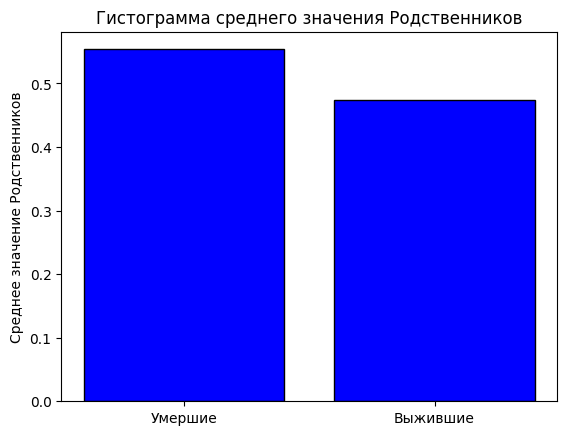

In [97]:
x = np.arange(len(newdf_surv_avg))
plt.bar(x, newdf_surv_avg, color='blue', edgecolor='black')
labels = ['Умершие', 'Выжившие']
plt.xticks(x, labels)
plt.ylabel('Среднее значение Родственников')
plt.title('Гистограмма среднего значения Родственников')

In [98]:
newdf_surv_avg = newdf_surv['Parch'].mean()
newdf_surv_avg

Survived
0    0.329690
1    0.464912
Name: Parch, dtype: float64

Родителей с детьми выжило больше. Не сошлось с примеров в задании.

Text(0.5, 1.0, 'Гистограмма среднего значения родители/дети')

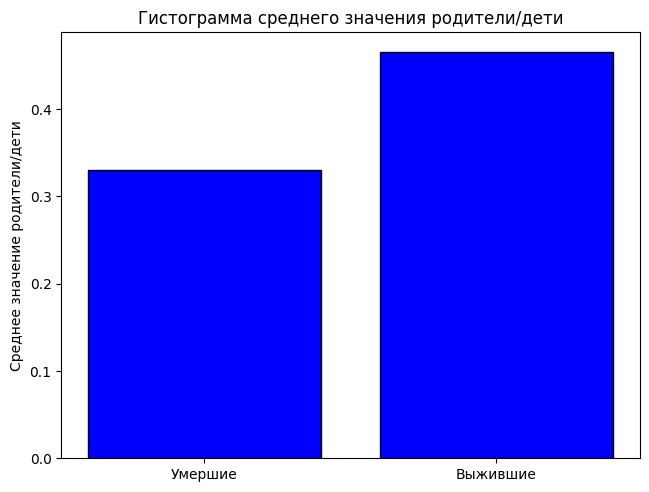

In [99]:
x = np.arange(len(newdf_surv_avg))
plt.bar(x, newdf_surv_avg, color='blue', edgecolor='black')
labels = ['Умершие', 'Выжившие']
plt.xticks(x, labels)
plt.tight_layout()
plt.ylabel('Среднее значение родители/дети')
plt.title('Гистограмма среднего значения родители/дети')

In [100]:
newdf_surv['Fare'].mean()

Survived
0    22.117887
1    48.395408
Name: Fare, dtype: float64

Text(0.5, 1.0, 'Гистограмма среднего значения стоимости билета')

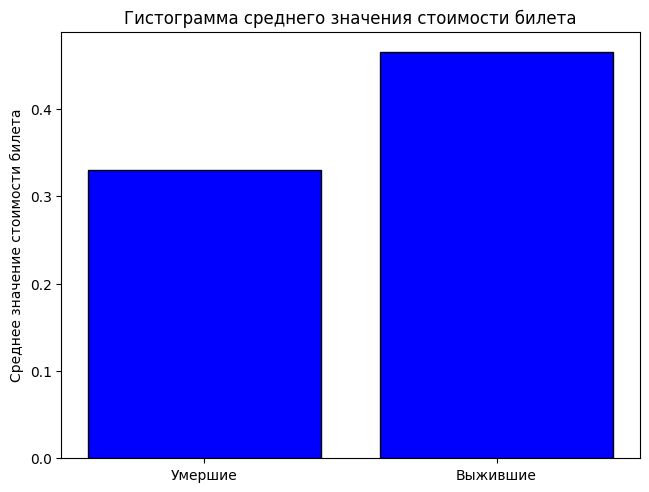

In [101]:
x = np.arange(len(newdf_surv_avg))
plt.bar(x, newdf_surv_avg, color='blue', edgecolor='black')
labels = ['Умершие', 'Выжившие']
plt.xticks(x, labels)
plt.tight_layout()
plt.ylabel('Среднее значение стоимости билета')
plt.title('Гистограмма среднего значения стоимости билета')

Дороже билет - выше выживаемость, подтверждает уровень класса

In [102]:
newdf_surv = newdf.groupby(['Pclass'] )
newdf_surv['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

Группировка по классу. Выше класс - выше выживаемость

Text(0.5, 1.0, 'Гистограмма среднего значения Выживших')

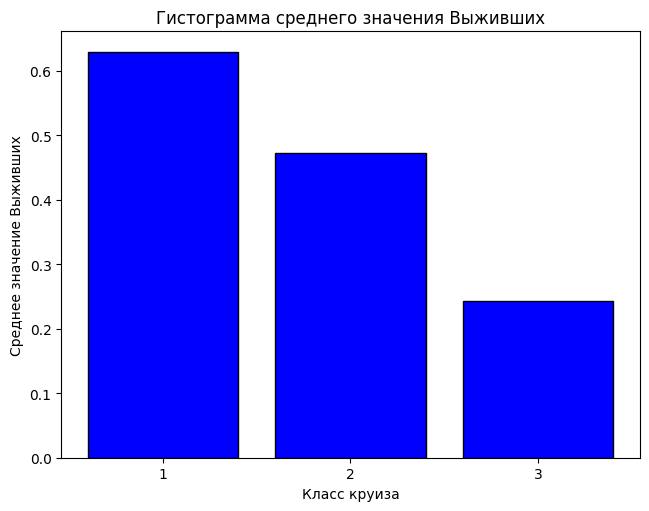

In [103]:
data = [0.629630,  0.472826, 0.242363 ]
x = np.arange(len(data))
plt.bar(x, data, color='blue', edgecolor='black')
labels = ['1', '2', '3']
plt.xticks(x, labels)
plt.tight_layout()
plt.xlabel('Класс круиза')
plt.ylabel('Среднее значение Выживших')
plt.title('Гистограмма среднего значения Выживших')

In [104]:
newdf_surv = newdf.groupby(['Parch'] )
newdf_surv['Survived'].mean()




Parch
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4    0.000000
5    0.200000
6    0.000000
Name: Survived, dtype: float64

Text(0.5, 1.0, 'Гистограмма среднего значения Выживших')

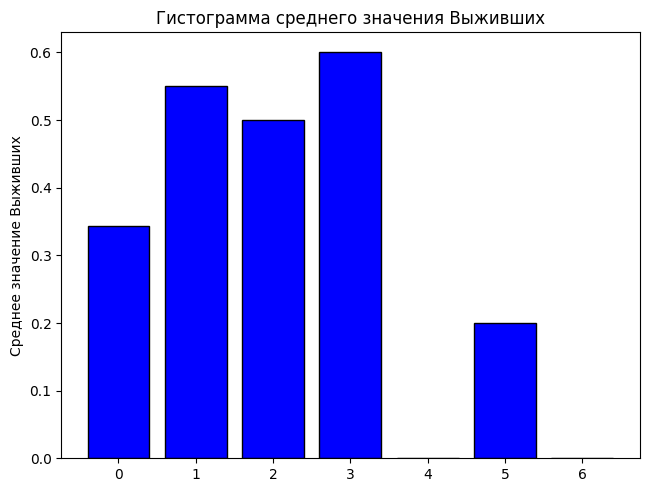

In [105]:
data = [0.343658, 0.550847, 0.500000, 0.600000, 0.000000, 0.200000, 0.000000]
x = np.arange(len(data))
plt.bar(x, data, color='blue', edgecolor='black')
labels = ['0', '1', '2', '3', '4', '5', '6']
plt.xticks(x, labels)
plt.tight_layout()
plt.ylabel('Среднее значение Выживших')
plt.title('Гистограмма среднего значения Выживших')

Группировка по Parch. Выживаемость с детьми выше

Пример HW6

In [106]:
survived = newdf[newdf['Survived']==1]
survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,A0,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,A0,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,A0,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,A0,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,A0,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [107]:
died = newdf[newdf['Survived']==0]
died

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,A0,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,A0,S
5,6,0,3,"Moran, Mr. James",male,30.0,0,0,330877,8.4583,A0,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,A0,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,A0,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,A0,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,A0,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,30.0,1,2,W./C. 6607,23.4500,A0,S


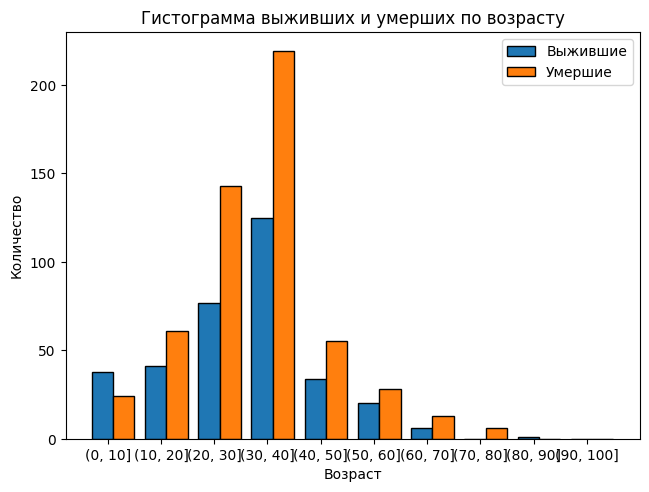

In [108]:
import matplotlib.pyplot as plt

bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
plt.hist([survived['Age'], died['Age']], bins=bins, label=['Выжившие', 'Умершие'], edgecolor='black', width=4)
labels = ['(0, 10]', '(10, 20]', '(20, 30]', '(30, 40]', '(40, 50]', '(50, 60]', '(60, 70]', '(70, 80]', '(80, 90]', '(90, 100]']
plt.xticks([i + 4 for i in bins[:-1]], labels)
plt.xlabel('Возраст')
plt.tight_layout()
plt.ylabel('Количество')
plt.title('Гистограмма выживших и умерших по возрасту')
plt.legend()